In [311]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, Conv2D, MaxPooling2D

In [179]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [180]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [298]:
classification_diff = [[],[],[],[]]

# Convolutional Neural Network

In [181]:
x_train_cnn = x_train.astype('float32') / 255
x_test_cnn = x_test.astype('float32') / 255
y_train_cnn = y_train
y_test_cnn = y_test

In [182]:
one_hot_encoder = OneHotEncoder(sparse = False)
one_hot_encoder.fit(y_train_cnn)
y_train_cnn = one_hot_encoder.transform(y_train_cnn)
y_test_cnn = one_hot_encoder.transform(y_test_cnn)

In [187]:
model_cnn = Sequential()
x_shape = x_train.shape[1:]

model_cnn.add(Conv2D(16, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(16, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Dropout(0.3))

model_cnn.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(32, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Dropout(0.3))

model_cnn.add(Conv2D(128, kernel_size = (3, 3), input_shape = x_shape, activation ="relu", padding='valid'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D((2,2), padding='valid'))
model_cnn.add(Dropout(0.4))

model_cnn.add(Flatten())
model_cnn.add(Dense(80, activation = 'relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(10, activation = 'softmax'))
print(model_cnn.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
batch_normalization_7 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 32)       

In [188]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [189]:
history = model_cnn.fit(x_train_cnn, y_train_cnn, epochs = 10 , batch_size = 128, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 121s 3ms/sample - loss: 2.0442 - accuracy: 0.2635 - val_loss: 2.6913 - val_accuracy: 0.1669
Epoch 2/10
40000/40000 [==============================] - 113s 3ms/sample - loss: 1.6725 - accuracy: 0.3754 - val_loss: 1.6153 - val_accuracy: 0.4069
Epoch 3/10
40000/40000 [==============================] - 113s 3ms/sample - loss: 1.5436 - accuracy: 0.4303 - val_loss: 1.7218 - val_accuracy: 0.4243
Epoch 4/10
40000/40000 [==============================] - 111s 3ms/sample - loss: 1.4347 - accuracy: 0.4781 - val_loss: 1.3400 - val_accuracy: 0.5104
Epoch 5/10
40000/40000 [==============================] - 112s 3ms/sample - loss: 1.3486 - accuracy: 0.5143 - val_loss: 1.2491 - val_accuracy: 0.5506
Epoch 6/10
40000/40000 [==============================] - 113s 3ms/sample - loss: 1.2890 - accuracy: 0.5394 - val_loss: 1.3432 - val_accuracy: 0.5233
Epoch 7/10
40000/40000 [==========================

Text(0.5, 1.0, 'Accuracy Curves')

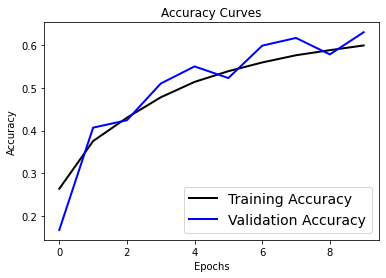

In [190]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [195]:
x_test_cnn2 = np.reshape(x_test_cnn, (10000, 32 * 32 * 3))

In [201]:
y_pred_cnn = model.predict(x_test_cnn2)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_test_cnn_classes = np.argmax(y_test_cnn, axis=1)

In [244]:
cnn_score = accuracy_score(y_test_cnn_classes, y_pred_cnn_classes)

In [245]:
cm1 = confusion_matrix(y_test_cnn_classes, y_pred_cnn_classes)

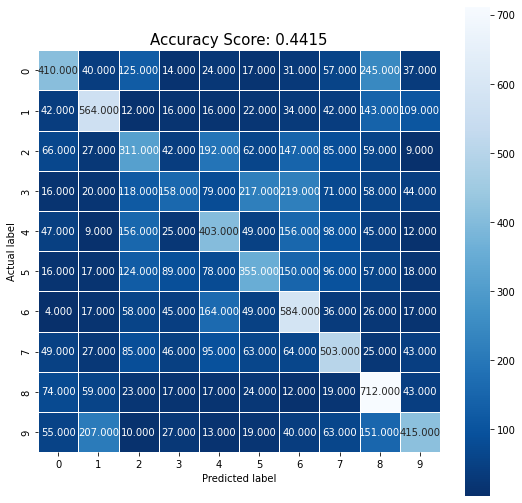

In [246]:
plt.figure(figsize = (9,9))
sns.heatmap(cm1, annot = True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(cnn_score)
plt.title(all_sample_title, size = 15);

In [247]:
tp_and_fn = cm1.sum(1)
tp_and_fp = cm1.sum(0)
tp = cm1.diagonal()

precision = tp / tp_and_fp
recall = tp / tp_and_fn

for i in range(10):
    print("Label: ",class_names[i],", Precision: ",precision[i],", Recall: ",recall[i])

Label:  airplane , Precision:  0.5263157894736842 , Recall:  0.41
Label:  automobile , Precision:  0.5714285714285714 , Recall:  0.564
Label:  bird , Precision:  0.30430528375733856 , Recall:  0.311
Label:  cat , Precision:  0.3298538622129436 , Recall:  0.158
Label:  deer , Precision:  0.37280296022201664 , Recall:  0.403
Label:  dog , Precision:  0.4047890535917902 , Recall:  0.355
Label:  frog , Precision:  0.40640222686151706 , Recall:  0.584
Label:  horse , Precision:  0.4700934579439252 , Recall:  0.503
Label:  ship , Precision:  0.46811308349769887 , Recall:  0.712
Label:  truck , Precision:  0.5555555555555556 , Recall:  0.415


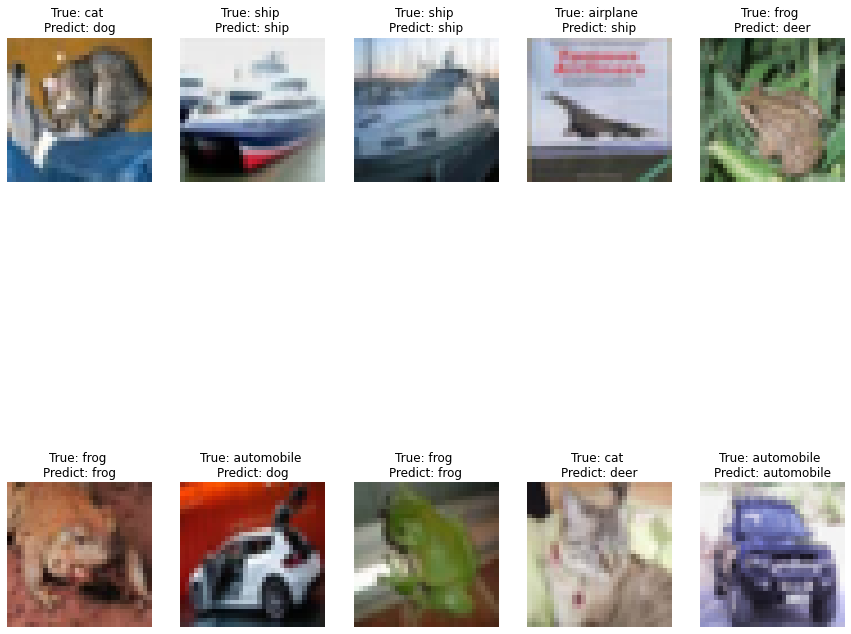

In [299]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(2, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(x_test_cnn[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[y_test_cnn_classes[i]], class_names[y_pred_cnn_classes[i]]))
    axes[i].axis('off')
    classification_diff[0].append([class_names[y_test_cnn_classes[i]], class_names[y_pred_cnn_classes[i]]])

# Logistic Regression

In [249]:
x_train_logit = x_train.reshape(50000, 3*32*32)
x_test_logit = x_test.reshape(10000, 3*32*32)
y_train_logit = y_train.flatten()
y_test_logit = y_test.flatten()

In [250]:
logit = LogisticRegression(solver = 'lbfgs')
logit.fit(x_train_logit, y_train_logit)

/Users/volkopat/opt/anaconda3/envs/py2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [251]:
y_pred_logit = logit.predict(x_test_logit)

In [252]:
logit_score = accuracy_score(y_test_logit, y_pred_logit)

In [253]:
cm2 = confusion_matrix(y_test_logit, y_pred_logit)

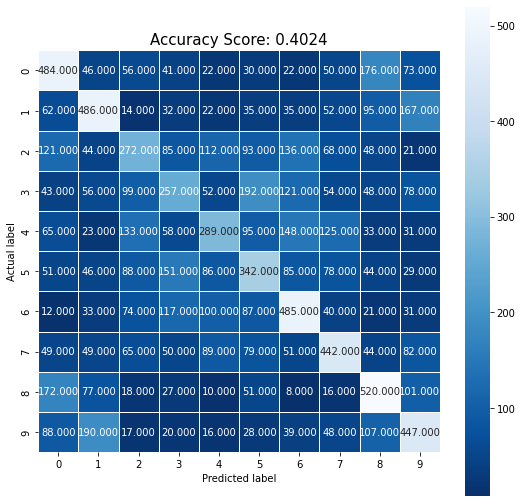

In [254]:
plt.figure(figsize = (9,9))
sns.heatmap(cm2, annot = True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logit_score)
plt.title(all_sample_title, size = 15);

In [255]:
tp_and_fn = cm2.sum(1)
tp_and_fp = cm2.sum(0)
tp = cm2.diagonal()

precision = tp / tp_and_fp
recall = tp / tp_and_fn

for i in range(10):
    print("Label: ",class_names[i],", Precision: ",precision[i],", Recall: ",recall[i])

Label:  airplane , Precision:  0.4219703574542284 , Recall:  0.484
Label:  automobile , Precision:  0.46285714285714286 , Recall:  0.486
Label:  bird , Precision:  0.3253588516746411 , Recall:  0.272
Label:  cat , Precision:  0.30668257756563244 , Recall:  0.257
Label:  deer , Precision:  0.36215538847117795 , Recall:  0.289
Label:  dog , Precision:  0.3313953488372093 , Recall:  0.342
Label:  frog , Precision:  0.42920353982300885 , Recall:  0.485
Label:  horse , Precision:  0.45426515930113054 , Recall:  0.442
Label:  ship , Precision:  0.45774647887323944 , Recall:  0.52
Label:  truck , Precision:  0.4216981132075472 , Recall:  0.447


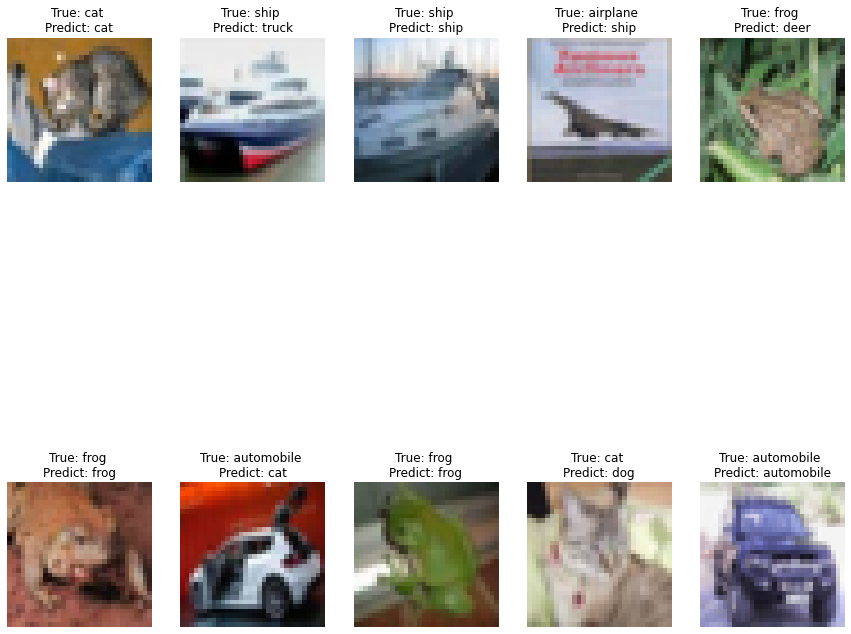

In [300]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(2, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[y_test_logit[i]], class_names[y_pred_logit[i]]))
    axes[i].axis('off')
    classification_diff[1].append([class_names[y_test_logit[i]], class_names[y_pred_logit[i]]])

# K-Nearest Neighbors Classifier

In [258]:
x_train_knn = x_train.reshape(50000, 3*32*32)
x_test_knn = x_test.reshape(10000, 3*32*32)
y_train_knn = y_train.flatten()
y_test_knn = y_test.flatten()

In [259]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_knn, y_train_knn)

KNeighborsClassifier(n_neighbors=10)

In [260]:
y_pred_knn = knn.predict(x_test_knn)

In [261]:
knn_score = accuracy_score(y_test_knn, y_pred_knn)

In [262]:
cm3 = confusion_matrix(y_test_knn, y_pred_knn)

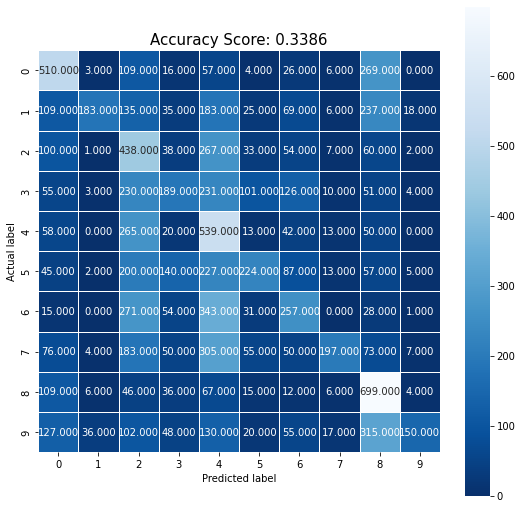

In [263]:
plt.figure(figsize = (9,9))
sns.heatmap(cm3, annot = True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn_score)
plt.title(all_sample_title, size = 15);

In [264]:
tp_and_fn = cm3.sum(1)
tp_and_fp = cm3.sum(0)
tp = cm3.diagonal()

precision = tp / tp_and_fp
recall = tp / tp_and_fn

for i in range(10):
    print("Label: ",class_names[i],", Precision: ",precision[i],", Recall: ",recall[i])

Label:  airplane , Precision:  0.42358803986710963 , Recall:  0.51
Label:  automobile , Precision:  0.7689075630252101 , Recall:  0.183
Label:  bird , Precision:  0.22132390096008084 , Recall:  0.438
Label:  cat , Precision:  0.3019169329073482 , Recall:  0.189
Label:  deer , Precision:  0.22945934440187313 , Recall:  0.539
Label:  dog , Precision:  0.42994241842610365 , Recall:  0.224
Label:  frog , Precision:  0.33033419023136246 , Recall:  0.257
Label:  horse , Precision:  0.7163636363636363 , Recall:  0.197
Label:  ship , Precision:  0.3800978792822186 , Recall:  0.699
Label:  truck , Precision:  0.7853403141361257 , Recall:  0.15


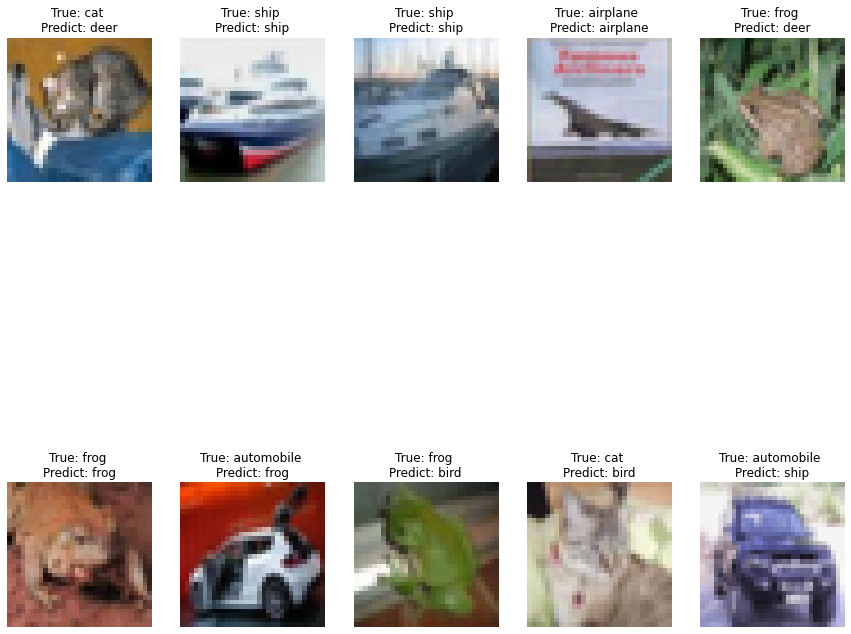

In [301]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(2, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[y_test_knn[i]], class_names[y_pred_knn[i]]))
    axes[i].axis('off')
    classification_diff[2].append([class_names[y_test_knn[i]], class_names[y_pred_knn[i]]])

# Neural Network

In [266]:
x_train_nn = x_train.reshape(50000, 3*32*32).astype('float32') / 255
x_test_nn = x_test.reshape(10000, 3*32*32).astype('float32') / 255
y_train_nn = y_train
y_test_nn = y_test

In [267]:
one_hot_encoder = OneHotEncoder(sparse = False)
one_hot_encoder.fit(y_train_nn)
y_train_nn = one_hot_encoder.transform(y_train_nn)
y_test_nn = one_hot_encoder.transform(y_test_nn)

In [268]:
model = Sequential()
x_shape = x_train_nn.shape[1:]

model.add(Dense(512, input_shape = x_shape))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [269]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [270]:
history2 = model.fit(x_train_nn, y_train_nn, epochs = 10 , batch_size = 128, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 11s 275us/sample - loss: 1.9884 - accuracy: 0.2756 - val_loss: 1.8615 - val_accuracy: 0.3285
Epoch 2/10
40000/40000 [==============================] - 10s 258us/sample - loss: 1.8375 - accuracy: 0.3311 - val_loss: 1.8023 - val_accuracy: 0.3600
Epoch 3/10
40000/40000 [==============================] - 10s 262us/sample - loss: 1.7716 - accuracy: 0.3607 - val_loss: 1.6989 - val_accuracy: 0.3982
Epoch 4/10
40000/40000 [==============================] - 11s 263us/sample - loss: 1.7412 - accuracy: 0.3724 - val_loss: 1.6701 - val_accuracy: 0.4046
Epoch 5/10
40000/40000 [==============================] - 11s 267us/sample - loss: 1.7054 - accuracy: 0.3842 - val_loss: 1.6547 - val_accuracy: 0.4159
Epoch 6/10
40000/40000 [==============================] - 11s 270us/sample - loss: 1.6843 - accuracy: 0.3941 - val_loss: 1.6380 - val_accuracy: 0.4235
Epoch 7/10
40000/40000 [====================

Text(0.5, 1.0, 'Accuracy Curves')

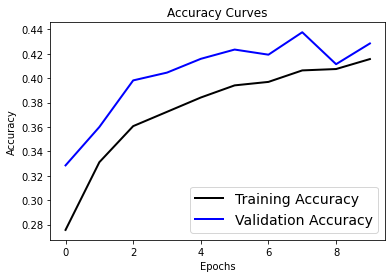

In [271]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history2.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history2.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [272]:
y_pred_nn = model.predict(x_test_nn)
y_pred_nn_classes = np.argmax(y_pred_nn, axis=1)
y_test_nn_classes = np.argmax(y_test_nn, axis=1)

In [273]:
nn_score = accuracy_score(y_test_nn_classes, y_pred_nn_classes)

In [274]:
cm4 = confusion_matrix(y_test_nn_classes, y_pred_nn_classes)

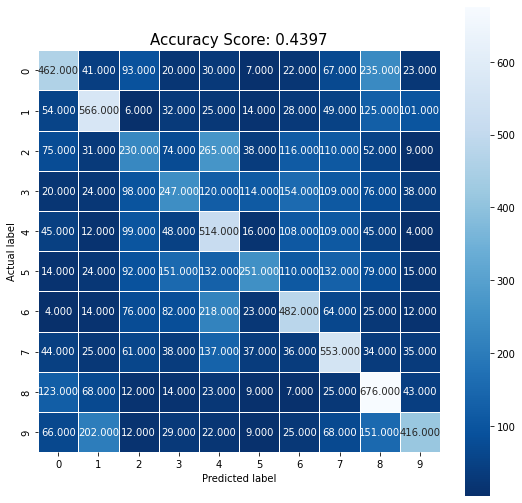

In [275]:
plt.figure(figsize = (9,9))
sns.heatmap(cm4, annot = True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(nn_score)
plt.title(all_sample_title, size = 15);

In [276]:
tp_and_fn = cm4.sum(1)
tp_and_fp = cm4.sum(0)
tp = cm4.diagonal()

precision = tp / tp_and_fp
recall = tp / tp_and_fn

for i in range(10):
    print("Label: ",class_names[i],", Precision: ",precision[i],", Recall: ",recall[i])

Label:  airplane , Precision:  0.5093715545755237 , Recall:  0.462
Label:  automobile , Precision:  0.5620655412115194 , Recall:  0.566
Label:  bird , Precision:  0.2952503209242619 , Recall:  0.23
Label:  cat , Precision:  0.3360544217687075 , Recall:  0.247
Label:  deer , Precision:  0.34589502018842533 , Recall:  0.514
Label:  dog , Precision:  0.48455598455598453 , Recall:  0.251
Label:  frog , Precision:  0.4430147058823529 , Recall:  0.482
Label:  horse , Precision:  0.43001555209953346 , Recall:  0.553
Label:  ship , Precision:  0.4512683578104139 , Recall:  0.676
Label:  truck , Precision:  0.5977011494252874 , Recall:  0.416


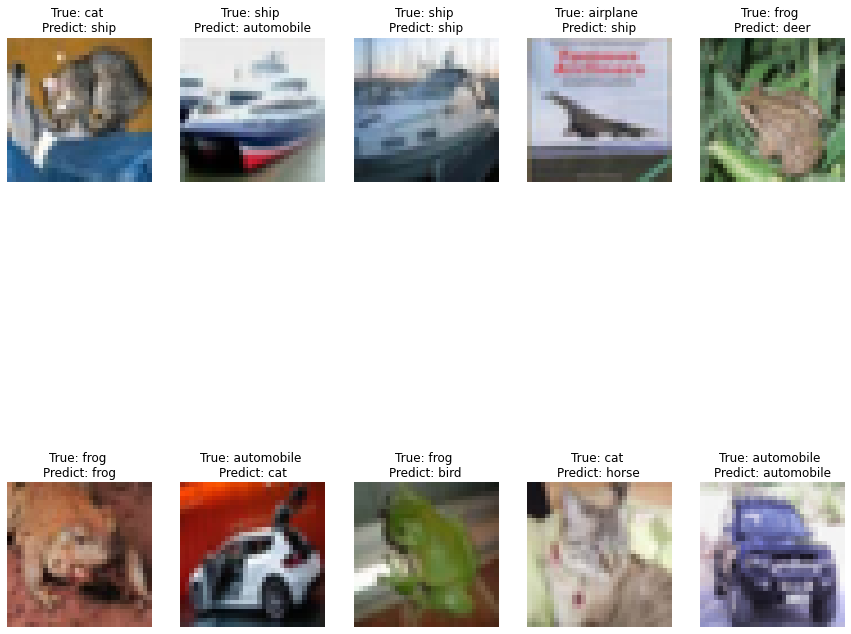

In [302]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(2, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[y_test_nn_classes[i]], class_names[y_pred_nn_classes[i]]))
    axes[i].axis('off')
    classification_diff[3].append([class_names[y_test_nn_classes[i]], class_names[y_pred_nn_classes[i]]])

## Classification Differences

In [323]:
classify = {
        'Convolutional Neural Network':[],
        'Logistic Regression':[],
        'K Nearest Neighbors':[],
        'Neural Network':[]
}

In [324]:
for i in range(10):
    classify['Convolutional Neural Network'].append(classification_diff[0][i][1]) 
    classify['Logistic Regression'].append(classification_diff[1][i][1]) 
    classify['K Nearest Neighbors'].append(classification_diff[2][i][1]) 
    classify['Neural Network'].append(classification_diff[3][i][1]) 

In [325]:
c = []
for i in range(10):
    c.append(classification_diff[0][i][0])

In [327]:
classify_pd = pd.DataFrame(classify, index = c)

### Here are the classification differences between different classifiers:

In [332]:
classify_pd

,Convolutional Neural Network,Logistic Regression,K Nearest Neighbors,Neural Network
cat,dog,cat,deer,ship
ship,ship,truck,ship,automobile
ship,ship,ship,ship,ship
airplane,ship,ship,airplane,ship
frog,deer,deer,deer,deer
frog,frog,frog,frog,frog
automobile,dog,cat,frog,cat
frog,frog,frog,bird,bird
cat,deer,dog,bird,horse
automobile,automobile,automobile,ship,automobile
